# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
plt.style.use(['seaborn-bright','dark_background'])

# Importing Dataset

In [2]:
data = pd.read_csv('churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


# Seperating Dependent and Independent variables

In [3]:
X = data.drop(columns=['churn', 'customer_id'])
Y = data['churn']

# Scaling of Data
We can Ignore this procedure in desicion tree model. As we don't need to do that

# Splitting of dataset

In [4]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X,Y,train_size=0.80, stratify=Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

((17653, 19), (4414, 19), (17653,), (4414,))

# Model Building, Predictions

## Importing Decision Tree Algorithm from Sklearn Library

In [5]:
from sklearn.tree import DecisionTreeClassifier as dtc
classifier = dtc(class_weight='balanced')

In [6]:
classifier.fit(x_train,y_train)
predicted_values = classifier.predict(x_train)

## Finding out Performance

#### Using Classification Report

In [7]:
from sklearn.metrics import classification_report as cr
print(cr(y_train,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [8]:
predicted_values = classifier.predict(x_test)
print(cr(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      3559
           1       0.43      0.40      0.42       855

    accuracy                           0.78      4414
   macro avg       0.64      0.64      0.64      4414
weighted avg       0.78      0.78      0.78      4414

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      3559
           1       0.43      0.40      0.42       855

    accuracy                           0.78      4414
   macro avg       0.64      0.64      0.64      4414
weighted avg       0.78      0.78      0.78      4414



# Visulaization of Decision Tree

In [9]:
!pip install graphviz

In [10]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree=classifier,out_file='tree_viz', max_depth=None, 
               feature_names=X.columns, label=None, impurity=False)

In [11]:
# from graphviz import render
# render(filepath='tree_viz', format='png',engine='neato')

'tree_viz.png'

'tree_viz.png'

# Pruning

In [14]:
classifier = dtc(class_weight='balanced')
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

DecisionTreeClassifier(class_weight='balanced')

# max_depth

In [15]:
from sklearn.metrics import f1_score
def calc_score(model,x1,y1,x2,y2):
    model.fit(x1,y1)
    
    predict = model.predict(x1)
    f1 = f1_score(y1,predict)
    
    predict = model.predict(x2)
    f2 = f1_score(y2,predict)
    
    return f1,f2

In [23]:
def effect(train_score,test_score,x_axis,title,maxval,maxval_i):
    plt.figure(figsize=(10,10),dpi=120)
    plt.plot(x_axis,train_score,color = 'red',label = 'train score')
    plt.plot(x_axis,test_score,color = 'blue',label = 'test score')
    plt.axhline(y=maxval, color='yellow', linestyle='--')
    plt.axvline(x=maxval_i, color='yellow', linestyle='--')
    plt.title(title)
    plt.legend()
    plt.show()

In [25]:
maxdepth = [i for i in range(1, 50)]
train = []
test = []
    maxval = -1
    maxval_i = None  # Initialize a variable to store the value of i for maxval

for i in maxdepth:
    model = dtc(class_weight='balanced', max_depth=i, random_state=42)
    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)
    if f2 > maxval:
        maxval = f2
        maxval_i = i



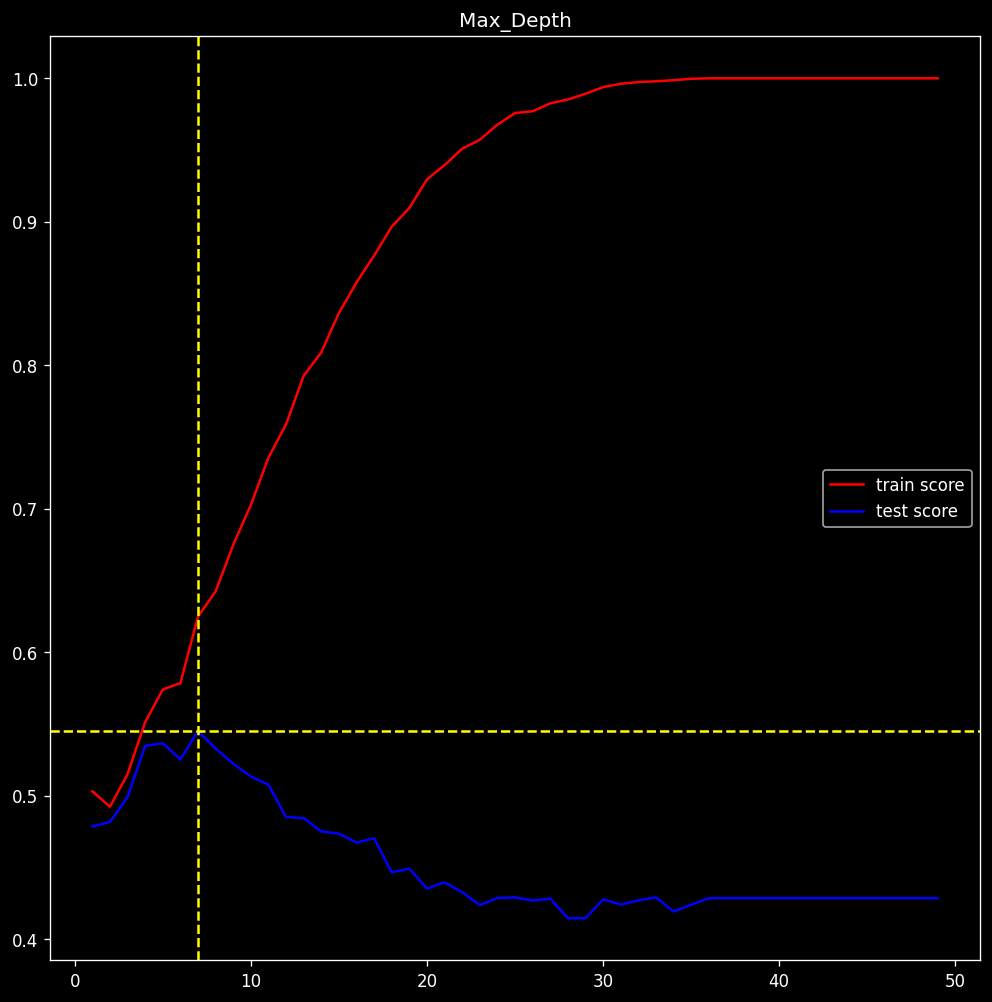

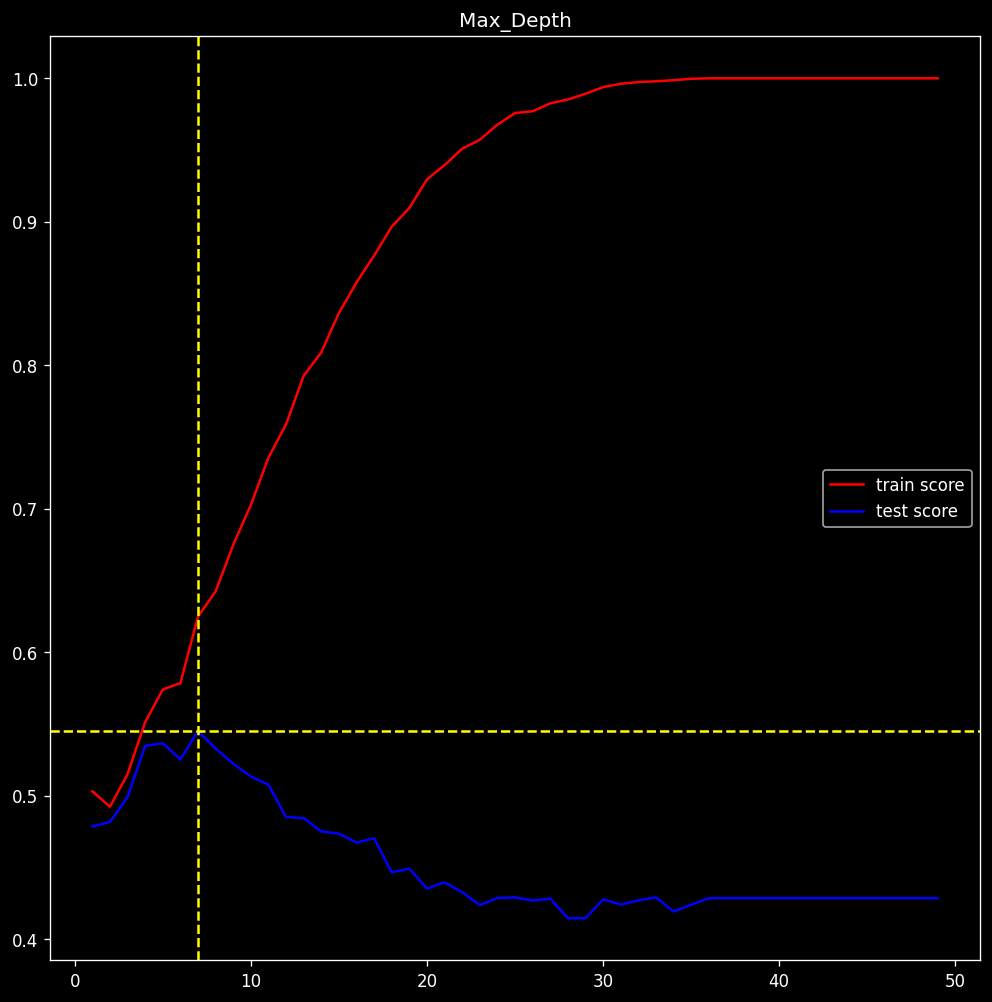

In [26]:
effect(train,test,range(1,50),'Max_Depth',maxval,maxval_i)

In [27]:
maxval,maxval_i

(0.5450798557444616, 7)

(0.5450798557444616, 7)

In [31]:
min_split = [i for i in range(2, 5000,25)]
train = []
test = []
maxval = -1
maxval_i = None  # Initialize a variable to store the value of i for maxval

for i in min_split:
    model = dtc(class_weight='balanced', min_samples_split=i, random_state=42)
    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)
    if f2 > maxval:
        maxval = f2
        maxval_i = i

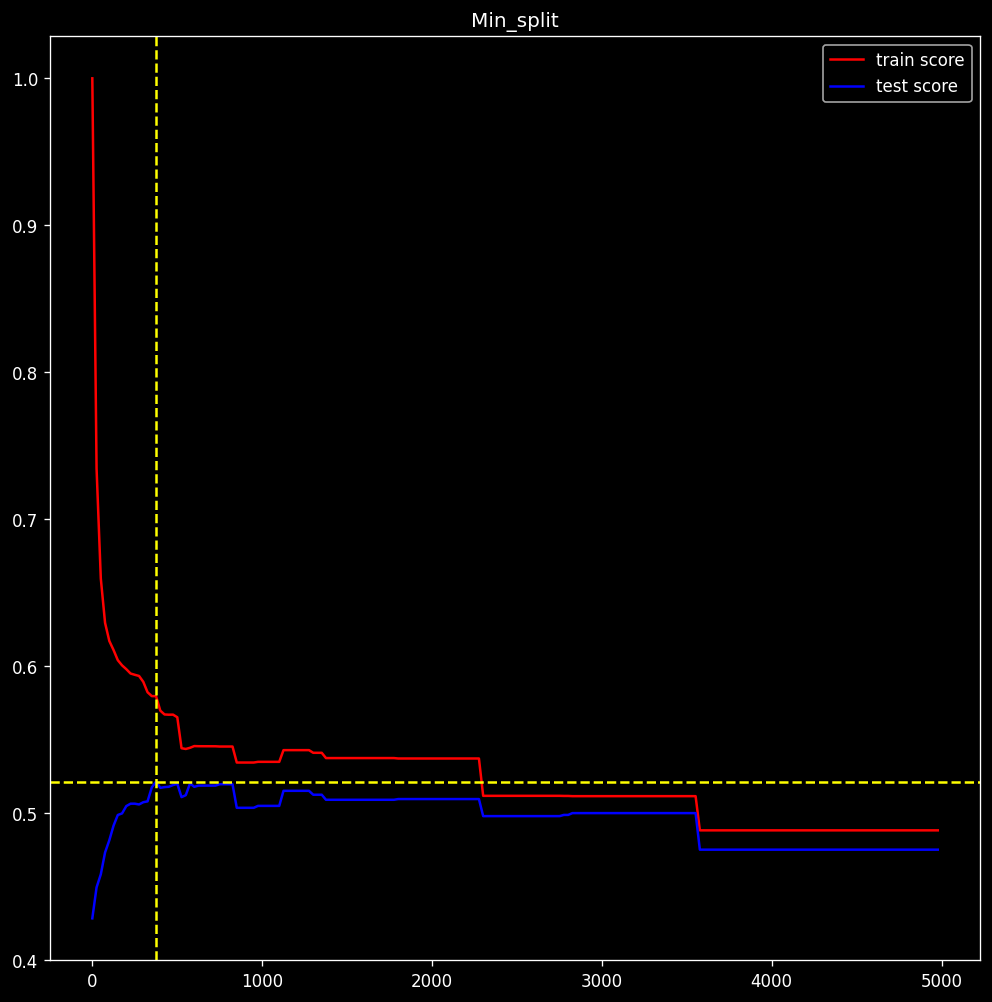

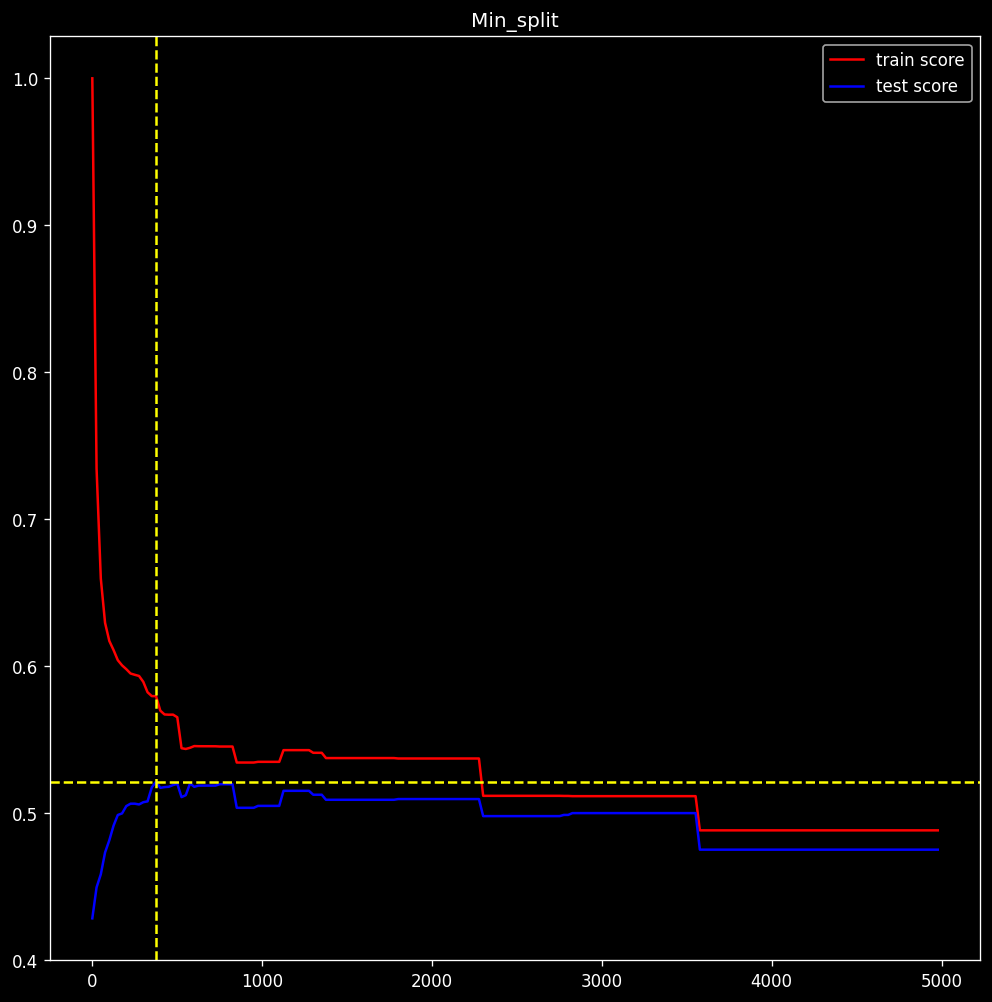

In [32]:
effect(train,test,range(2, 5000,25),'Min_split',maxval,maxval_i)

In [33]:
maxval,maxval_i

(0.521415270018622, 377)

(0.521415270018622, 377)

In [43]:
maxleafnode = [i for i in range(2, 200)]
train = []
test = []
maxval = -1
maxval_i = None  # Initialize a variable to store the value of i for maxval

for i in maxleafnode:
    model = dtc(class_weight='balanced', max_leaf_nodes=i, random_state=42)
    f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)
    if f2 > maxval:
        maxval = f2
        maxval_i = i

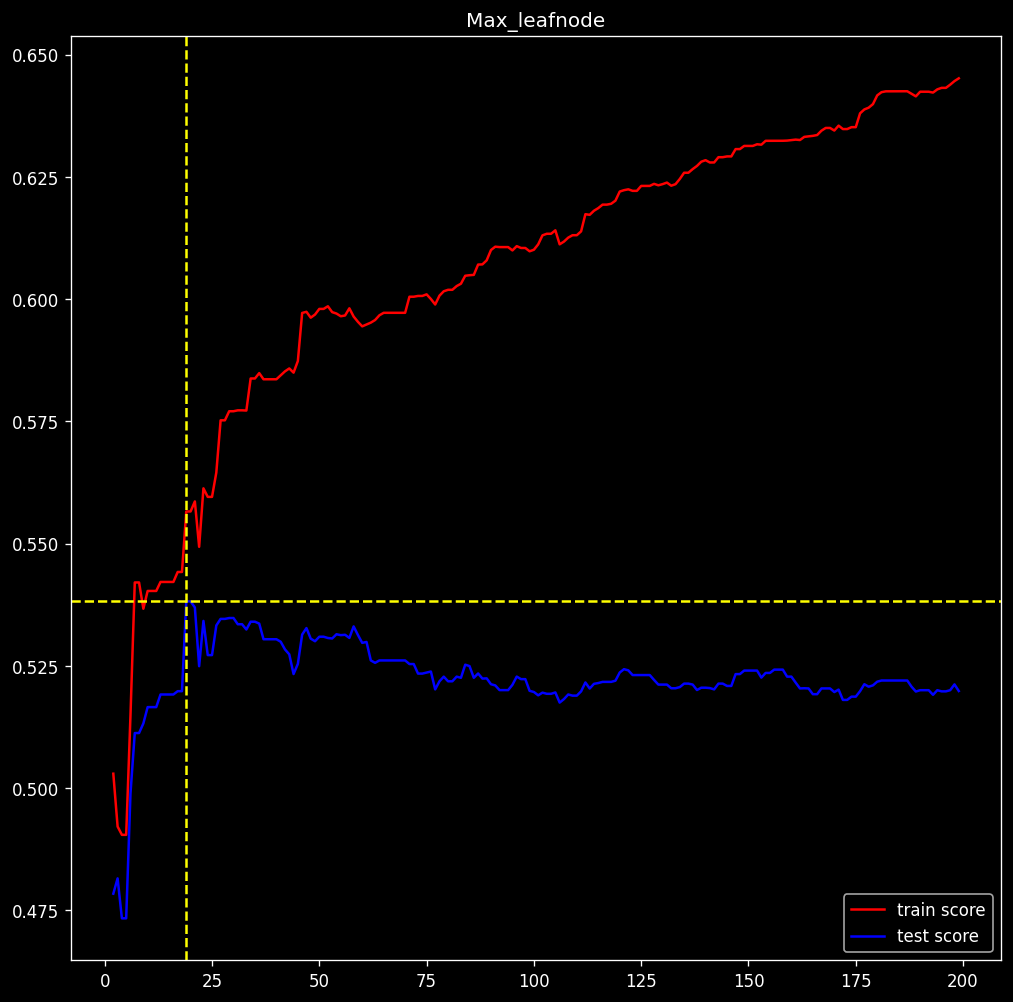

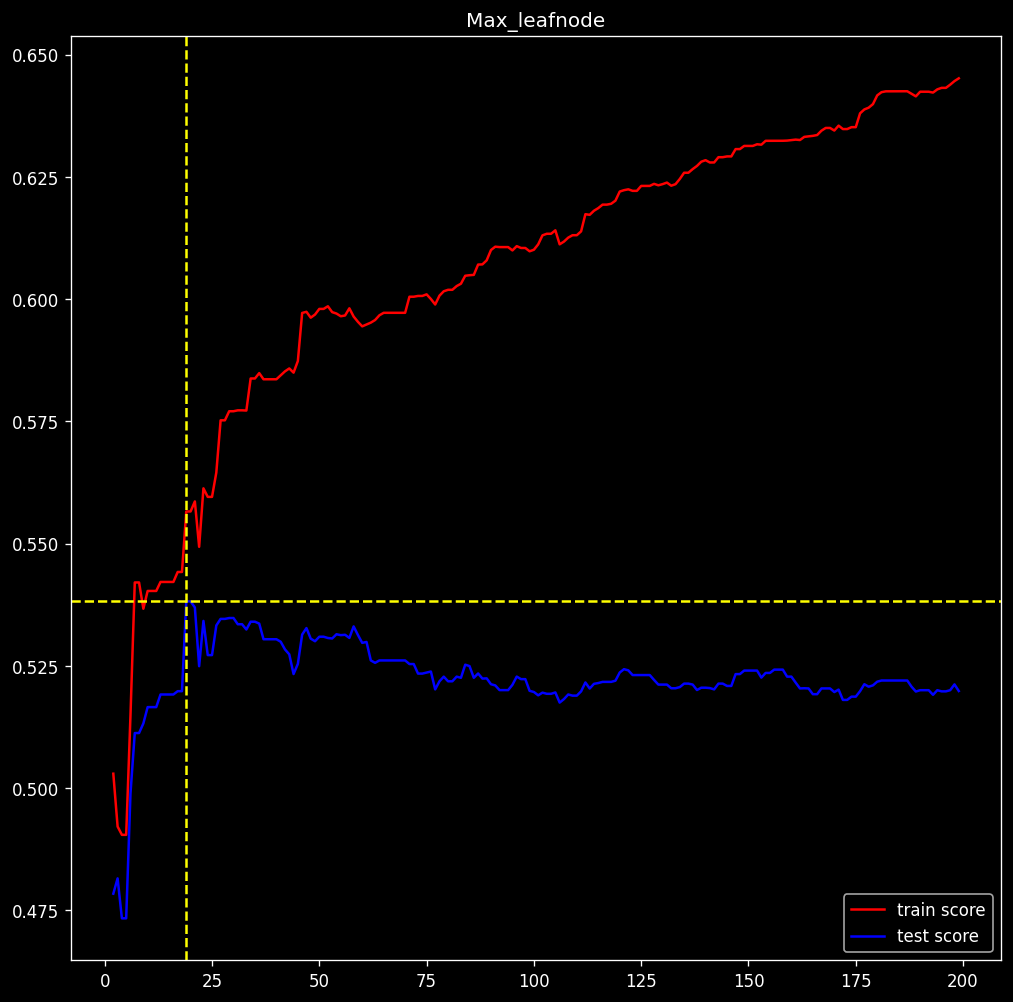

In [44]:
effect(train,test,range(2,200),'Max_leafnode',maxval,maxval_i)

In [45]:
maxval_i

19

19

In [46]:
model = dtc(class_weight='balanced', min_samples_split=377, max_leaf_nodes=19, max_depth=7, random_state=42)

In [47]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, max_leaf_nodes=19,
                       min_samples_split=377, random_state=42)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, max_leaf_nodes=19,
                       min_samples_split=377, random_state=42)

In [49]:
    predict_tr = model.predict(x_train)
    f1 = f1_score(y_train,predict_tr)
    
    predict_ts = model.predict(x_test)
    f2 = f1_score(y_test,predict_ts)
    
f1,f2

(0.5565853658536586, 0.5381995133819951)

(0.5565853658536586, 0.5381995133819951)

In [50]:
print(cr(y_train,predict_tr))
print(cr(y_test,predict_ts))

              precision    recall  f1-score   support

           0       0.91      0.82      0.87     14234
           1       0.48      0.67      0.56      3419

    accuracy                           0.79     17653
   macro avg       0.69      0.75      0.71     17653
weighted avg       0.83      0.79      0.81     17653

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      3559
           1       0.46      0.65      0.54       855

    accuracy                           0.79      4414
   macro avg       0.68      0.73      0.70      4414
weighted avg       0.82      0.79      0.80      4414

              precision    recall  f1-score   support

           0       0.91      0.82      0.87     14234
           1       0.48      0.67      0.56      3419

    accuracy                           0.79     17653
   macro avg       0.69      0.75      0.71     17653
weighted avg       0.83      0.79      0.81     17653

              preci

# Feature Importance

In [51]:
feature_imp = pd.Series(model.feature_importances_,index=X.columns)
k = feature_imp.sort_values()

<BarContainer object of 19 artists>

<BarContainer object of 19 artists>

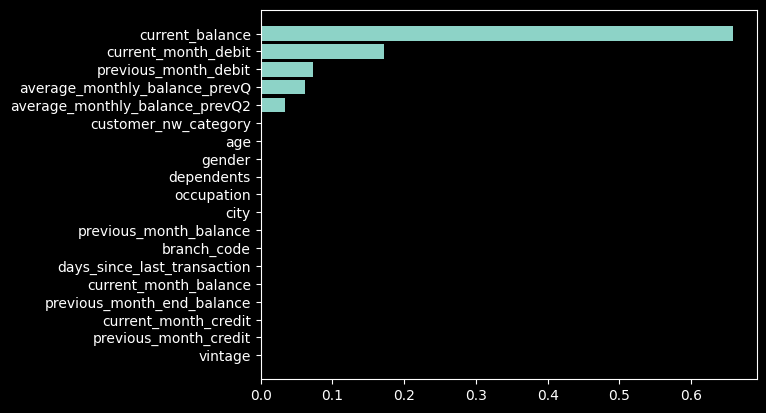

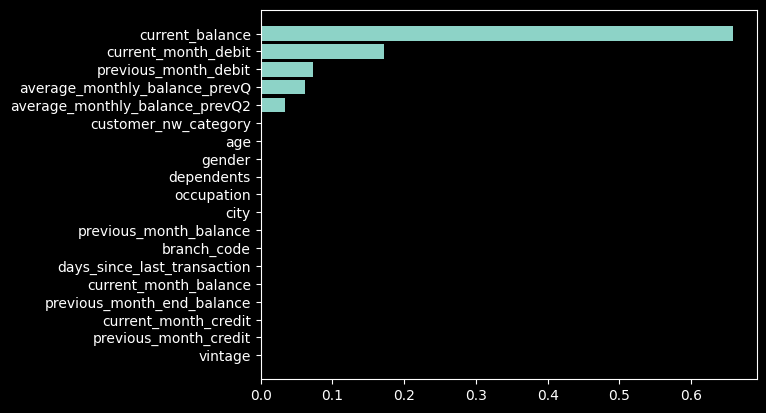

In [52]:
plt.barh(k.index,k)

In [54]:
model2 = classifier.fit(x_train,y_train)

<BarContainer object of 19 artists>

<BarContainer object of 19 artists>

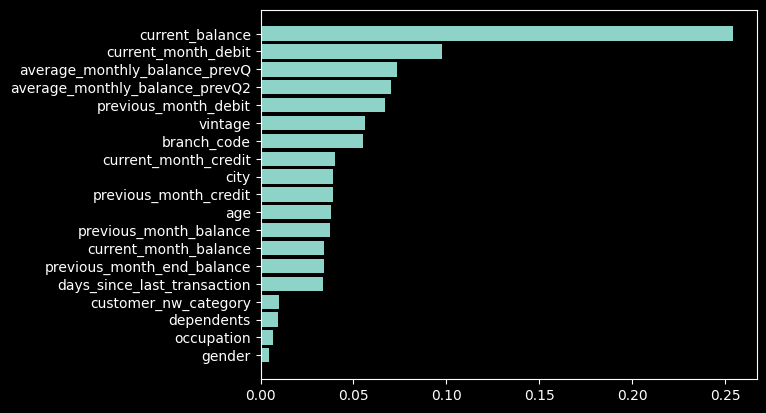

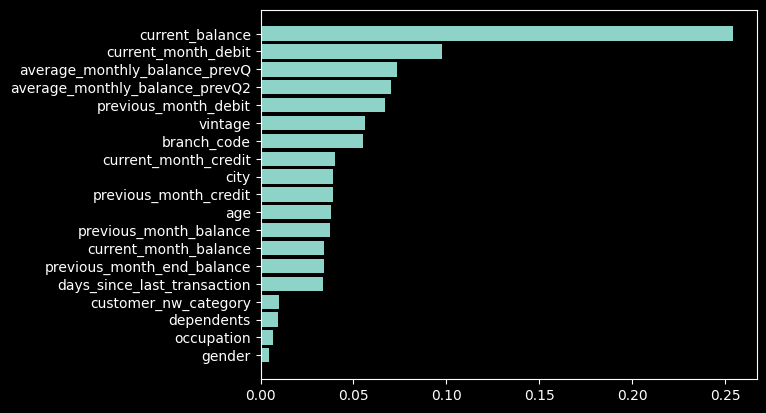

In [55]:
feature_imp = pd.Series(model2.feature_importances_,index=X.columns)
k = feature_imp.sort_values()
plt.barh(k.index,k)